# Análisis de catálogos fotométricos

**Autor:** Roberto Muñoz <br>
**Github:** <https://github.com/rpmunoz>

Este notebook muestra cómo cargar en memoria un catálogo fotométrico y hacer análisis exploratorio.

Este notebook se apoya en el uso de librerías estándar de Python y otras creadas por la comunidad de Astronomía.

- numpy
- pandas
- matplotlib
- Pillow
- astropy
- astroquery

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM

In [2]:
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.filterwarnings("ignore", category=AstropyWarning) 
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

### Cargamos los archivos

In [3]:
spiralFile = 'data/SDSS_phot_spiral.csv'
ellipticalFile = 'data/SDSS_phot_elliptical.csv'

In [4]:
spiralDF = pd.read_csv(spiralFile)
spiralDF.head()

,RA,DEC,u,g,r,i,z,redshift,Filename
0,186.430379,6.890050,19.29072,17.56456,16.78211,16.36568,16.09331,0.076548,data\sdss\SDSS_galaxy00.jpg
1,187.661986,-3.234936,17.69997,16.47884,16.00701,15.73655,15.52771,0.041252,data\sdss\SDSS_galaxy01.jpg
2,234.735495,32.823727,19.09427,18.02415,17.42668,17.11024,16.90405,0.126288,data\sdss\SDSS_galaxy02.jpg
3,150.822284,18.865613,20.17254,18.65029,17.58645,17.09255,16.74145,0.163317,data\sdss\SDSS_galaxy03.jpg
4,249.858354,40.602508,17.52493,16.38439,15.97529,15.74936,15.57530,0.034727,data\sdss\SDSS_galaxy04.jpg


In [5]:
ellipticalDF = pd.read_csv(ellipticalFile)
ellipticalDF.head()

,RA,DEC,u,g,r,i,z,redshift,Filename
0,133.410484,37.352685,20.37412,18.43065,17.48223,17.05733,16.77052,0.103878,data\sdss\SDSS_galaxy00.jpg
1,132.631845,31.092379,20.72427,18.91892,17.55565,17.03991,16.70897,0.241009,data\sdss\SDSS_galaxy01.jpg
2,148.320466,54.541002,20.11238,18.15816,16.82867,16.34992,16.00213,0.214942,data\sdss\SDSS_galaxy02.jpg
3,131.718462,35.731479,19.15211,17.73698,17.07174,16.73274,16.53992,0.085522,data\sdss\SDSS_galaxy03.jpg
4,147.346017,7.188771,20.60811,18.63410,17.60214,17.18304,16.81255,0.128056,data\sdss\SDSS_galaxy04.jpg


In [6]:
spiralDF['g-r'] = spiralDF['g'] - spiralDF['r']
ellipticalDF['g-r'] = ellipticalDF['g'] - ellipticalDF['r']

Text(0.5, 1.0, 'Diagrama color - Galaxias espirales')

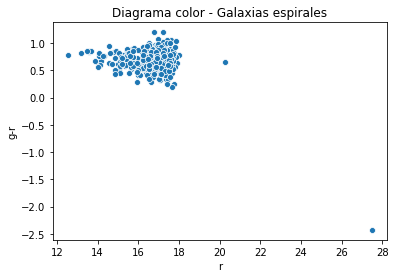

In [7]:
sns.scatterplot(x='r', y='g-r', data=spiralDF)
plt.title('Diagrama color - Galaxias espirales')

(0.0, 1.379587499999999)

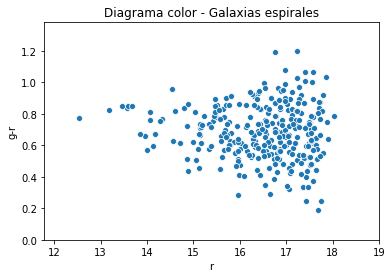

In [8]:
sns.scatterplot(x='r', y='g-r', data=spiralDF)
plt.title('Diagrama color - Galaxias espirales')
plt.xlim(right=19)
plt.ylim(bottom=0)

Text(0.5, 1.0, 'Diagrama color - Galaxias elípticas')

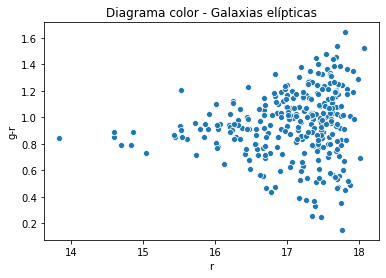

In [9]:
sns.scatterplot(x='r', y='g-r', data=ellipticalDF)
plt.title('Diagrama color - Galaxias elípticas')

### Calculamos la distancia y magnitud absoluta

In [10]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [11]:
spiralDF['distance'] = cosmo.luminosity_distance(spiralDF['redshift'])
spiralDF['Mr'] = spiralDF['r'] - 5*np.log10(spiralDF['distance']*1e6/10)

spiralDF.head()

,RA,DEC,u,g,r,i,z,redshift,Filename,g-r,distance,Mr
0,186.430379,6.890050,19.29072,17.56456,16.78211,16.36568,16.09331,0.076548,data\sdss\SDSS_galaxy00.jpg,0.78245,346.758462,-20.918025
1,187.661986,-3.234936,17.69997,16.47884,16.00701,15.73655,15.52771,0.041252,data\sdss\SDSS_galaxy01.jpg,0.47183,182.235839,-20.296159
2,234.735495,32.823727,19.09427,18.02415,17.42668,17.11024,16.90405,0.126288,data\sdss\SDSS_galaxy02.jpg,0.59747,591.453196,-21.432922
3,150.822284,18.865613,20.17254,18.65029,17.58645,17.09255,16.74145,0.163317,data\sdss\SDSS_galaxy03.jpg,1.06384,782.918658,-21.882133
4,249.858354,40.602508,17.52493,16.38439,15.97529,15.74936,15.57530,0.034727,data\sdss\SDSS_galaxy04.jpg,0.40910,152.682067,-19.943650


In [12]:
ellipticalDF['distance'] = cosmo.luminosity_distance(ellipticalDF['redshift'])
ellipticalDF['Mr'] = ellipticalDF['r'] - 5*np.log10(ellipticalDF['distance']*1e6/10)

ellipticalDF.head()

,RA,DEC,u,g,r,i,z,redshift,Filename,g-r,distance,Mr
0,133.410484,37.352685,20.37412,18.43065,17.48223,17.05733,16.77052,0.103878,data\sdss\SDSS_galaxy00.jpg,0.94842,479.390047,-20.921215
1,132.631845,31.092379,20.72427,18.91892,17.55565,17.03991,16.70897,0.241009,data\sdss\SDSS_galaxy01.jpg,1.36327,1208.864519,-22.856238
2,148.320466,54.541002,20.11238,18.15816,16.82867,16.34992,16.00213,0.214942,data\sdss\SDSS_galaxy02.jpg,1.32949,1062.429193,-23.302830
3,131.718462,35.731479,19.15211,17.73698,17.07174,16.73274,16.53992,0.085522,data\sdss\SDSS_galaxy03.jpg,0.66524,389.815191,-20.882554
4,147.346017,7.188771,20.60811,18.63410,17.60214,17.18304,16.81255,0.128056,data\sdss\SDSS_galaxy04.jpg,1.03196,600.416124,-21.290122


Text(0.5, 1.0, 'Diagrama color - Galaxias espirales')

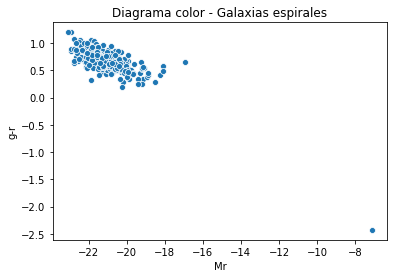

In [13]:
sns.scatterplot(x='Mr', y='g-r', data=spiralDF)
plt.title('Diagrama color - Galaxias espirales')

(0.0, 1.379587499999999)

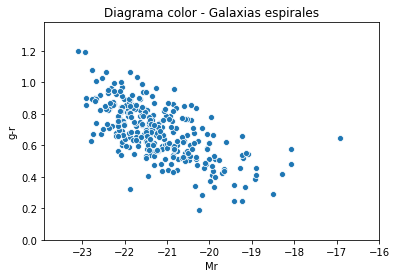

In [14]:
sns.scatterplot(x='Mr', y='g-r', data=spiralDF)
plt.title('Diagrama color - Galaxias espirales')
plt.xlim(right=-16)
plt.ylim(bottom=0)

Text(0.5, 1.0, 'Diagrama color - Galaxias elípticas')

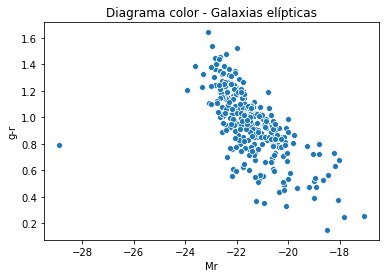

In [15]:
sns.scatterplot(x='Mr', y='g-r', data=ellipticalDF)
plt.title('Diagrama color - Galaxias elípticas')

### Análisis de regresión

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
trainDF, testDF = train_test_split(ellipticalDF, test_size=0.3, random_state=42)

print("Tamaño del train set: ", len(trainDF))
print("Tamaño del test set: ", len(testDF))

Tamaño del train set:  209
Tamaño del test set:  90


In [18]:
X_train=np.array(trainDF['Mr'])[np.newaxis].T
y_train=np.array(trainDF['g-r'])

X_test=np.array(testDF['Mr'])[np.newaxis].T
y_test=np.array(testDF['g-r'])

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % model.score(X_train, y_train))
print("R^2 en test: %f" % model.score(X_test, y_test))

R^2 en entrenamiento: 0.375542
R^2 en test: 0.505183


### Usamos el modelo y hacemos predicciones

In [20]:
X_pred = np.array(ellipticalDF['Mr'])[np.newaxis].T
y_pred = model.predict(X_pred)

Text(0.5, 1.0, 'Diagrama color - Galaxias elípticas')

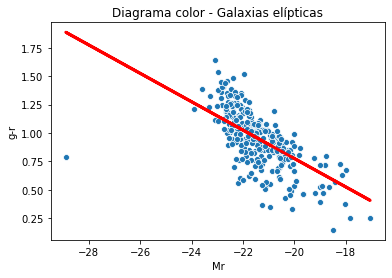

In [21]:
sns.scatterplot(x='Mr', y='g-r', data=ellipticalDF)
plt.plot(X_pred, y_pred, color='red', linewidth=3)
plt.title('Diagrama color - Galaxias elípticas')

### Limpieza de outliers

In [22]:
from sklearn.neighbors import LocalOutlierFactor

In [23]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

print("R^2 en entrenamiento: %f" % model.score(X_train, y_train))
print("R^2 en test: %f" % model.score(X_test, y_test))

R^2 en entrenamiento: 0.372234
R^2 en test: 0.568119


In [25]:
X_pred = np.array(ellipticalDF['Mr'])[np.newaxis].T
y_pred = model.predict(X_pred)

Text(0.5, 1.0, 'Diagrama color - Galaxias elípticas')

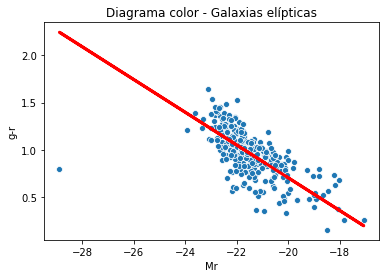

In [26]:
sns.scatterplot(x='Mr', y='g-r', data=ellipticalDF)
plt.plot(X_pred, y_pred, color='red', linewidth=3)
plt.title('Diagrama color - Galaxias elípticas')